	 episode=500, t=9000.0,	 total reward=-5.689
	 final r = 7099.862,	 final psi_dot = 0.001051
	 required r = 7100.000,	 required psi_dot = 0.001055


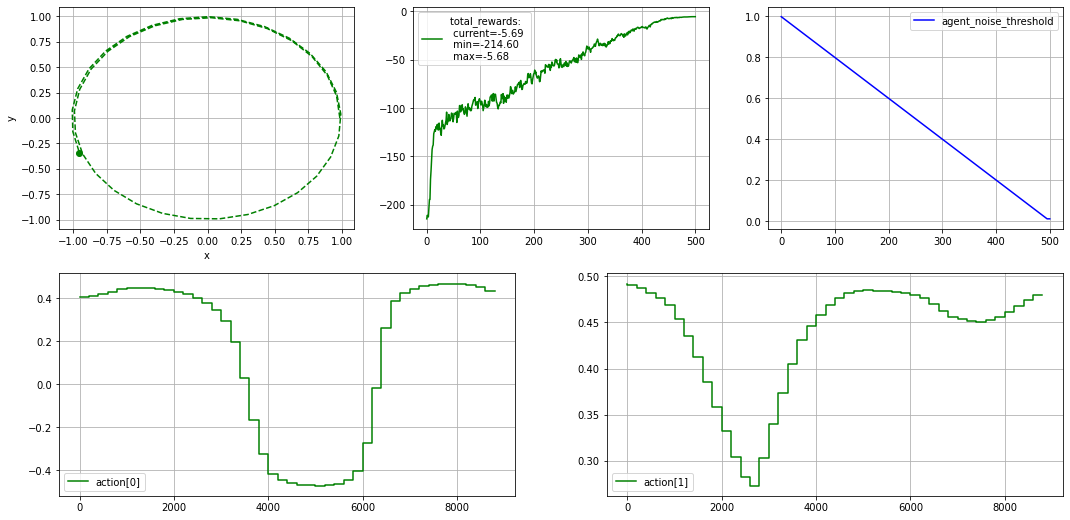

In [16]:
import os, sys
import numpy as np
import torch.nn as nn
sys.path.insert(0, os.path.abspath('../../finite-horizon_control_gym'))
from Environments.EarthOrbitalMotion.EarthOrbitalMotion import EarthOrbitalMotion
from Environments.EarthOrbitalMotion.EarthOrbitalMotionVisualizer import EarthOrbitalMotionVisualizer
sys.path.insert(0, os.path.abspath('..'))
from Agents.CEM import CEM_Continuous
from Agents.Utilities.SequentialNetwork import SequentialNetwork
from Agents.Utilities.Noises import OUNoise, UniformNoise
from Solvers import OneAgentSolver as solver
%load_ext autoreload
%autoreload 2

episode_n = 501
session_n = 20

env = EarthOrbitalMotion(dt=200, inner_step_n=1,required_orbit=7100, terminal_time=9000, 
                                    normalized_vector=np.array([1/7000, 1/7000, 100, 1, 100]),
                                    action_radius=np.array([0.5, 0.5]))

pi_model = SequentialNetwork([env.state_dim, 128, 64, env.action_dim], nn.ReLU(), nn.Tanh())
noise = UniformNoise(env.action_dim, threshold_decrease=1/(episode_n*session_n))
#agent = CEM_Continuous(env.state_dim, env.action_dim, env.action_min, env.action_max, pi_model, noise, 
#             percentile_param=70,  tau=1e-1, pi_model_lr=1e-2, learning_iter_per_fit=5)
agent = CEM_Continuous(env.action_min, env.action_max, pi_model, noise, 
                       pi_model_lr=1e-2, tau=1e-2, percentile_param=80, learning_iter_per_fit=16)

visualizer = EarthOrbitalMotionVisualizer(waiting_for_show=50)
solver.go(env, agent, episode_n=episode_n, show=visualizer.show, session_len=2500, session_n=session_n, agent_learning='by_sessions')